<h1> Uniformity Analysis</b>

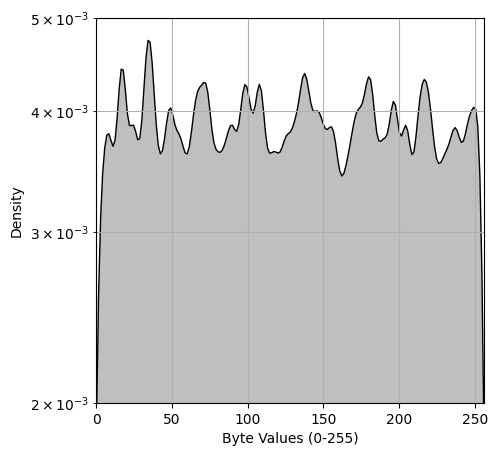

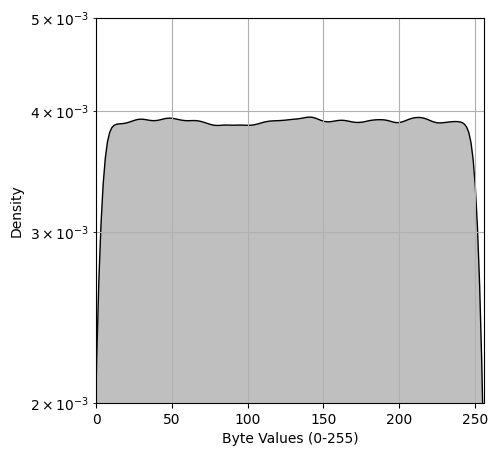

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

original_file_path = 'data/files/landscape.png'
encrypted_file_path = 'data/files/enc/landscape.png_PF.npy'

with open(original_file_path, 'rb') as file:
    original_file_data = file.read()

with open(encrypted_file_path, 'rb') as file:
    encrypted_file_data = file.read()

original_byte_values = np.frombuffer(original_file_data, dtype=np.uint8)
encrypted_byte_values = np.frombuffer(encrypted_file_data, dtype=np.uint8)


# sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))

plt.xlabel('Byte Values (0-255)')
plt.ylabel('Density')

plt.xlim([0,256])
plt.ylim([0.002, 0.005])
plt.yscale('log')
plt.grid(True, which='both')

sns.kdeplot(original_byte_values, fill=True, color="black")

plt.savefig('plots/uniform_analysis_original.svg', format='svg')

plt.show()

plt.figure(figsize=(5, 5))

plt.xlabel('Byte Values (0-255)')
plt.ylabel('Density')

plt.xlim([0,256])
plt.ylim([0.002, 0.005])
plt.yscale('log')
plt.grid(True, which='both')

sns.kdeplot(encrypted_byte_values, fill=True, color="black")
plt.savefig('plots/uniform_analysis_encrypted.svg', format='svg')

plt.show()

In [31]:
import numpy as np
from scipy.stats import pearsonr

max_length = max(len(original_byte_values), len(encrypted_byte_values))
original_byte_values_padded = np.pad(original_byte_values, (0, max_length - len(original_byte_values)), 'constant')
encrypted_byte_values_padded = np.pad(encrypted_byte_values, (0, max_length - len(encrypted_byte_values)), 'constant')

correlation, p_value = pearsonr(original_byte_values_padded, encrypted_byte_values_padded)

print(f"Pearson correlation: {correlation}")
print(f"P-value: {p_value}")



Pearson correlation: -0.01831099822259385
P-value: 0.0
